In [2]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt


In [3]:
def load_data(data, train_dataset, test_dataset, reporter: str, path: str):
    data[(train_dataset, test_dataset, reporter)] = pd.read_csv(path)

In [4]:
data = {}

for d in [0,5,10,30,50]:

    dataset = f"imdb_misspelled_{d}"

    ccs_path = f'/home/waree/elk-reporters/arith-huggyllama/llama-13b/sethapun/imdb_misspelled_{d}/ccs/eval.csv'
    vinc_path = f'/home/waree/elk-reporters/arith-huggyllama/llama-13b/sethapun/imdb_misspelled_{d}/vinc/eval.csv'

    load_data(data, dataset, dataset, 'ccs', ccs_path)
    load_data(data, dataset, dataset, 'vinc', vinc_path)

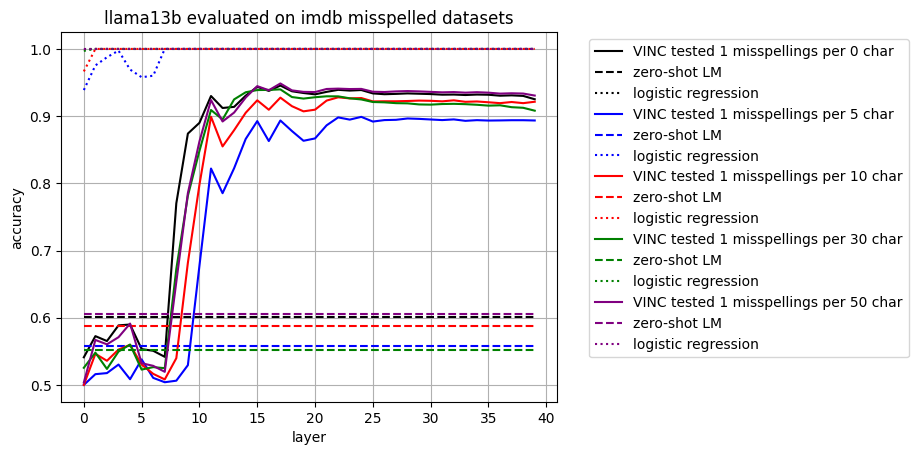

In [5]:
fig, ax = plt.subplots()
ax.set_title(fr"llama13b evaluated on imdb misspelled datasets")
ax.set_xlabel("layer")
ax.set_ylabel("accuracy")
ax.grid(True)

# Set line colors and styles
line_colors = ['black', 'blue', 'red', 'green', 'purple', 'brown', 'pink', 'teal', 'grey', 'orange']
lr_line_style = ':'
zs_line_style = '--'
ccs_line_style = '-.'

for i,d in enumerate([0,5,10,30,50]):
    dataset = f"imdb_misspelled_{d}"

    experiment = data[(dataset, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc_estimate']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'VINC tested 1 misspellings per {d} char', color=line_color)

    if 'lm_acc_estimate' in experiment.columns:
        lm_acc = experiment['lm_acc_estimate']
        # Set line color and style for zero-shot dataset
        ax.plot(layers, lm_acc, label='zero-shot LM',
                color=line_color, linestyle=zs_line_style)

    if 'lr_acc_estimate' in experiment.columns:
        lr_acc = experiment['lr_acc_estimate']
        # Set line color and style for logistic regression dataset
        ax.plot(layers, lr_acc, label='logistic regression',
                color=line_color, linestyle=lr_line_style)
        
    # experiment = data[(dataset, dataset, 'ccs')]
    # layers = experiment['layer']
    # acc = experiment['acc_estimate']
    # ax.plot(layers, acc, label=f'CCS tested 1 misspellings per {d} char', color=line_color, linestyle=ccs_line_style)
            
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()